In [8]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

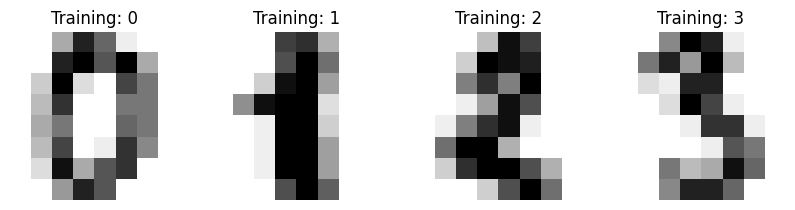

In [9]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [10]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
#clf = svm.SVC(gamma=0.001)
clf = LinearDiscriminantAnalysis()

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

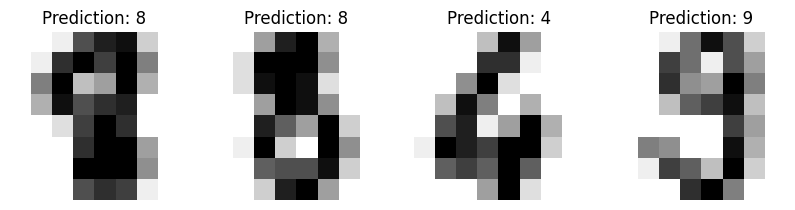

In [11]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [12]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.92      0.89      0.91        91
           2       0.97      0.91      0.94        86
           3       0.90      0.92      0.91        91
           4       0.99      0.90      0.94        92
           5       0.90      0.95      0.92        91
           6       0.95      0.99      0.97        91
           7       0.96      0.92      0.94        89
           8       0.90      0.83      0.86        88
           9       0.79      0.91      0.84        92

    accuracy                           0.92       899
   macro avg       0.92      0.92      0.92       899
weighted avg       0.92      0.92      0.92       899




Confusion matrix:
[[87  0  0  0  0  0  1  0  0  0]
 [ 0 81  0  0  0  0  1  0  1  8]
 [ 1  0 78  5  0  0  0  0  1  1]
 [ 0  1  1 84  0  1  1  0  3  0]
 [ 1  1  0  0 83  0  0  1  2  4]
 [ 0  0  0  0  0 86  2  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  1  1  3  0 82  0  2]
 [ 0  4  0  1  0  4  0  1 73  5]
 [ 1  0  1  2  0  2  0  1  1 84]]


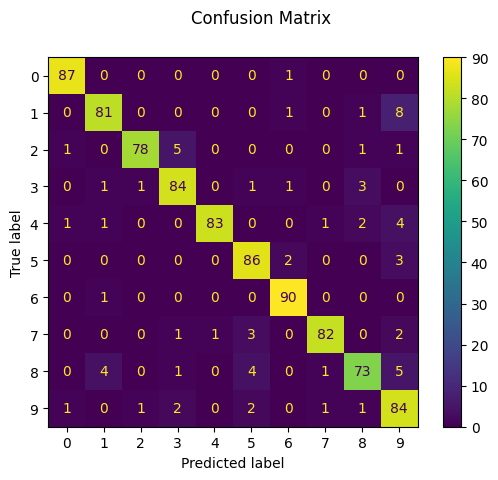

In [13]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()